# ინტერნეტ მაღაზია – SHOP

* პროექტის განხილვა

* პროექტის საქაღალდის შექმნა `django-base-guide/shop`

* ვირტუალური გარემოს დაყენება

* ჯანგოს დაყენება

* ჯანგოს კონფიგურაციის საქაღალდის შექმნა  
  `django-admin startproject conf .`

*  `manage.py`, `conf/settings.py` და `conf/urls.py` ფაილების განხილვა

* გავუშვათ სერვერი  
  `py manage.py runserver`

* პირველადი მიგრაცია  
  `py manage.py migrate`

* შევქმნათ `main` აპლიკაცია  
  `py manage.py startapp main`

* `main` აპლიკაცია დავარეგისტრიროთ `conf/settings.py` ფაილში

---

მოვაწესრიგოთ მარშრუტები...

`conf/urls.py`

```py
from django.contrib import admin
from django.urls import path, include

urlpatterns = [
  path('admin/', admin.site.urls),
  path('', include('main.urls', namespace='main')),
]
```
---

`main/urls.py`

```py
from django.urls import path

app_name = 'main'

urlpatterns = [
  
]
```
---

__პროექტის github-ზე ატვირთვა__

`https://desktop.github.com/download/` ვებ-გვერდიდან ჩამოვტვირთოთ და დავაინსტალიროთ `GitHub Desktop` აპლიკაცია.

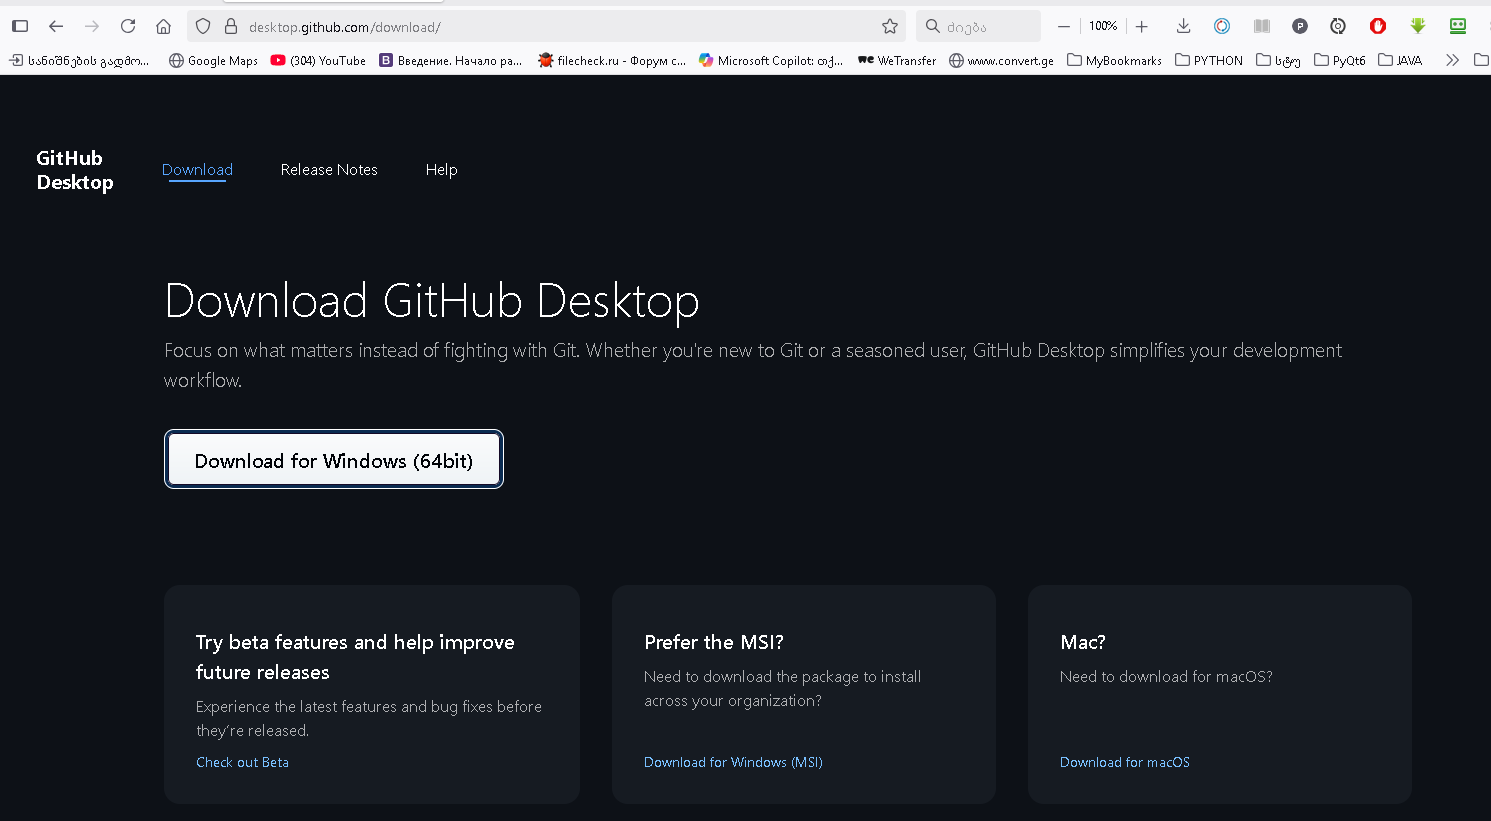

---

`GitHub Desktop`-ზე ჩვენი პროექტი დავკლონოთ.

`Add -> Add existing repository`

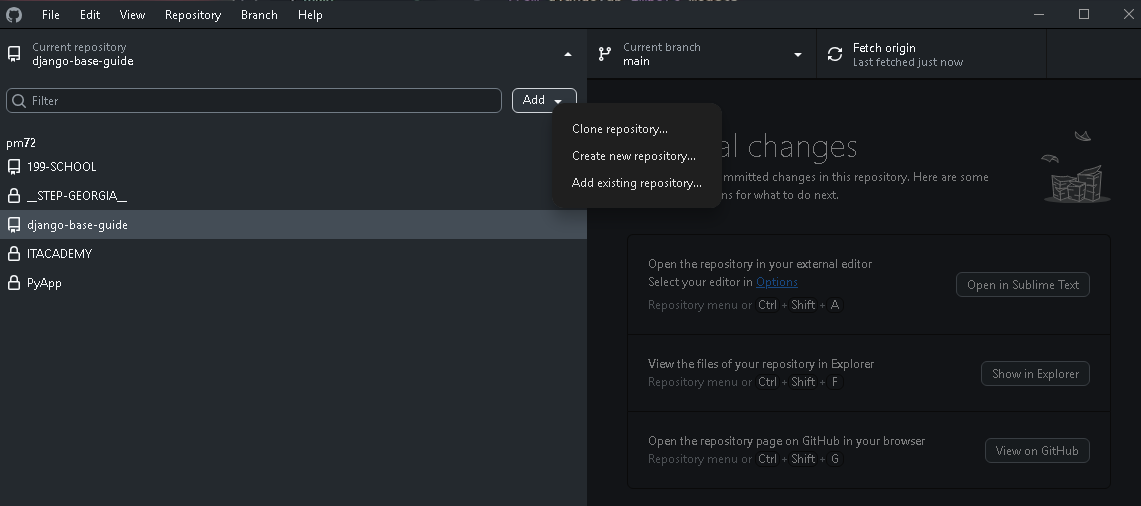

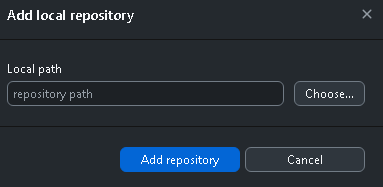  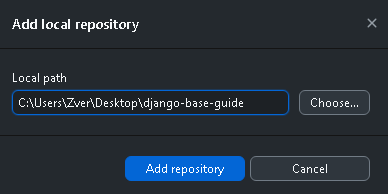  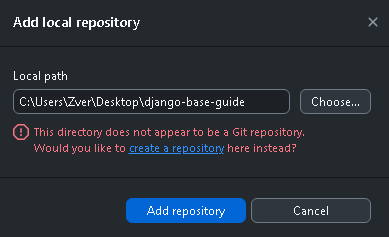

`როგორც ჩანს, ეს დირექტორია არ არის `Git`-ის რეპოზიტპორია.`

`გსურთ შექმნათ რეპოზიტორია აქ?`

დავაწკაპუნოთ `create a repository` ბმულს.

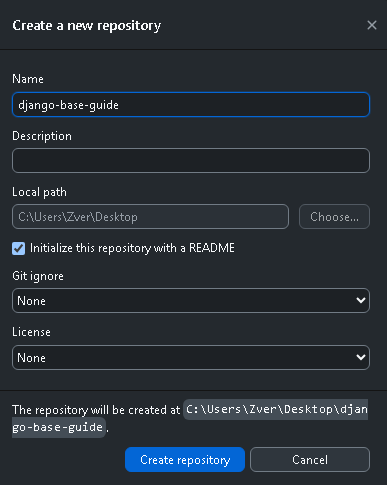

დავაწკაპუნოთ `Create repository` ღილაკს.

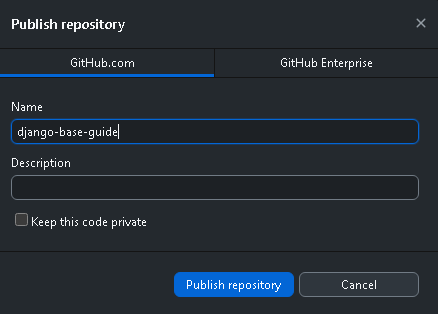

შემდეგ `GitHub Desktop`-ის მარჯვენა ჩანართში ვაჭერთ `Publish repository` ღილაკს და `git`-ზე შეიმნება რეპოზიტორია.

---

პროექტის საქაღალდეში იქმნება სხვადასხვა საქაღალდეები და ფაილები, რომლთა `github`-ზე ატვირთვა არ არის აუცილებელი – „არ დანაგვიანდეს“ პროექტი.

მაგალითად კეშ-ფაილები, ვიდეოები, სურათები და ა.შ.

მოგეხსებათ გიტი ინტერნეტშია მოთავსებული დად დიდი ფაილების ატვირთვა ძალიან უჭირს და უმრავლეს შემთხვევაში არც ატვირთავს...

ამისთვის გვჭირდება ხელით შევქმნათ `.gitignore` ფაილი და ჩავწეროთ ის საქაღალდეები და ფაილები რომელთა ატვირთვაც არ გვინდა.

პროექტის მთავარ საქაღალდეში, ჩვენს შემთხვევაში `shop`, შევქმნათ `.gitignore` და ჩავწეროთ შემდეგი:

`shop/.gitignore`

```.gitignore
venv/
.venv/
.pylintrc
__pycache__/

.vscode
.idea
.env

# db.sqlite3
media/
```
---

__მოდელები – models__

`main/models.py`

```py
from django.db import models


class Category(models.Model):
  name = models.CharField(max_length=100, db_index=True)
  slug = models.CharField(max_length=100, unique=True)


  class Meta:
    ordering = ('name',)
    verbose_name = 'კატეგორია'
    verbose_name_plural = 'კატეგორიები'
  

  def __str__(self):
    return self.name


class Product(models.Model):
  category = models.ForeignKey(Category, related_name='produtcs',
                               on_delete=models.CASCADE)
  name = models.CharField(max_length=100, db_index=True)
  slug = models.CharField(max_length=100, unique=True)
  image = models.ImageField(upload_to='products/%Y/%m/%d', blank=True)
  description = models.TextField(blank=True)
  price = models.DecimalField(max_digits=10, decimal_places=2)
  available = models.BooleanField(default=True)
  created = models.DateTimeField(auto_now_add=True)
  updated = models.DateTimeField(auto_now=True)


  class Meta:
    ordering = ('name',)
    verbose_name = 'პროდუქტი'
    verbose_name_plural = 'პროდუქტები'
  

  def __str__(self):
    return self.name
```
---

გავაკეთოთ მიგრაციები:

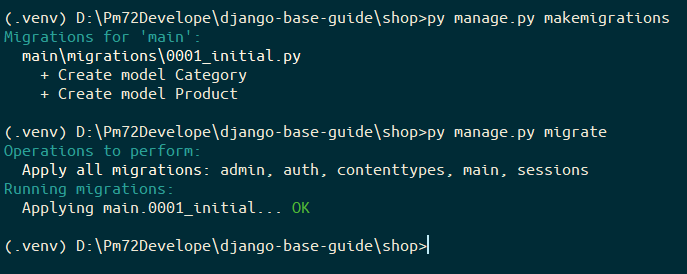

---

დავარეგისტრიროთ ახალდშექმნილი მოდელები:

`main/admin.py`

```py
from django.contrib import admin

from . models import Category, Product

@admin.register(Category)
class CategoryAdmin(admin.ModelAdmin):
  list_display = ('name', 'slug')
  prepopulated_fields = {'slug': ('name',)}


@admin.register(Product)
class ProductAdmin(admin.ModelAdmin):
  list_display = ('name', 'category', 'price', 'available', 'created', 'updated')
  list_filter = ('available', 'created', 'updated', 'category')
  list_editable = ('price', 'available')
  prepopulated_fields = {'slug': ('name',)}
```
---

შევქმნათ სუპერმომხმარებელი და შევიდეთ ადმინ-პანელში:

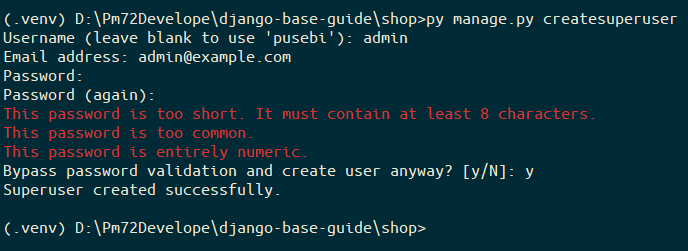

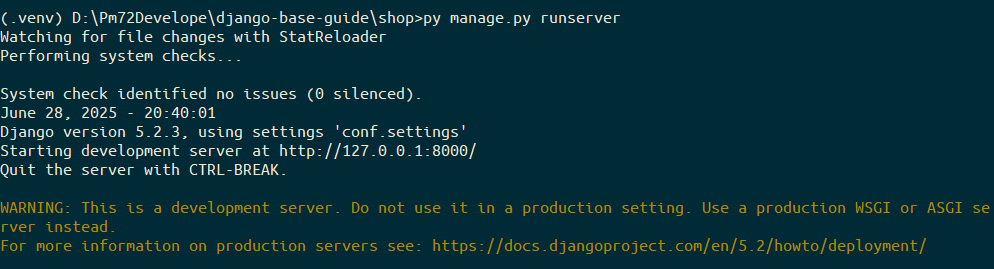

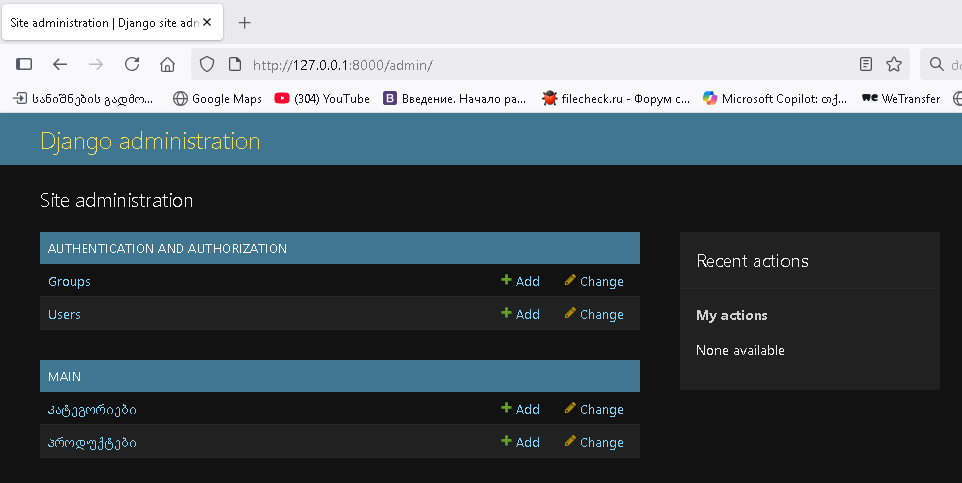

---

შევქმნათ კატეგორია:

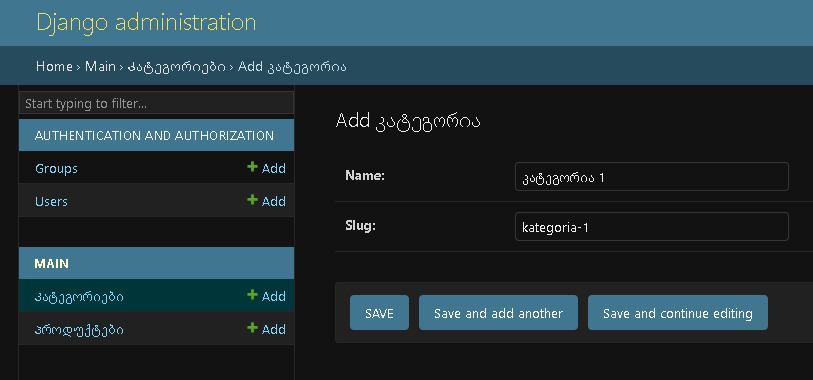

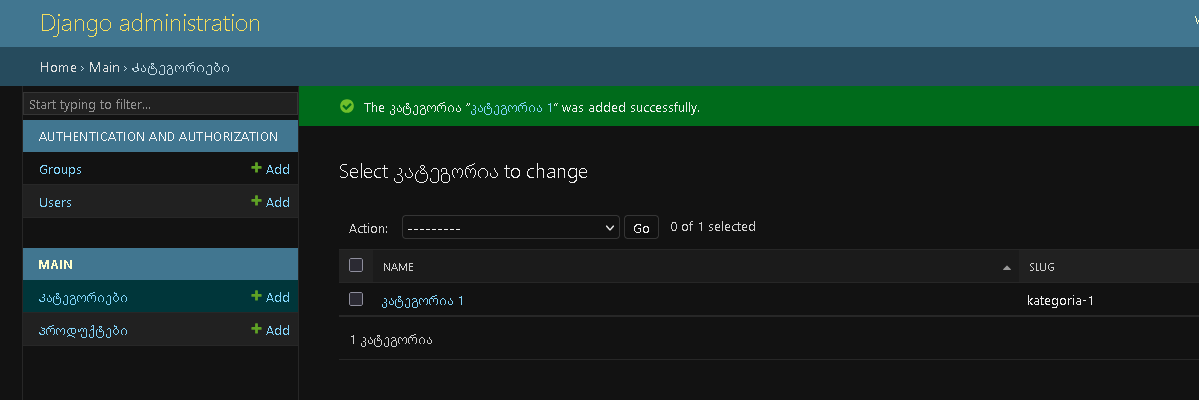

---

სანამ ახალ პროდუქტს დავამატებთ, საჭიროა ილუსტრაციების საქაღალდისთვის `.gitignore` ფაილის შექმნა `django-base-guide` საქაღალდეში და ჩავწეროთ:

`django-base-guide/.gitignore`

```.gitignore
images/
```

ამით ილუსტრაციები `git`-ზე არ აიტვირთება.

---

ახლა პროდუქტი დავამატოთ:

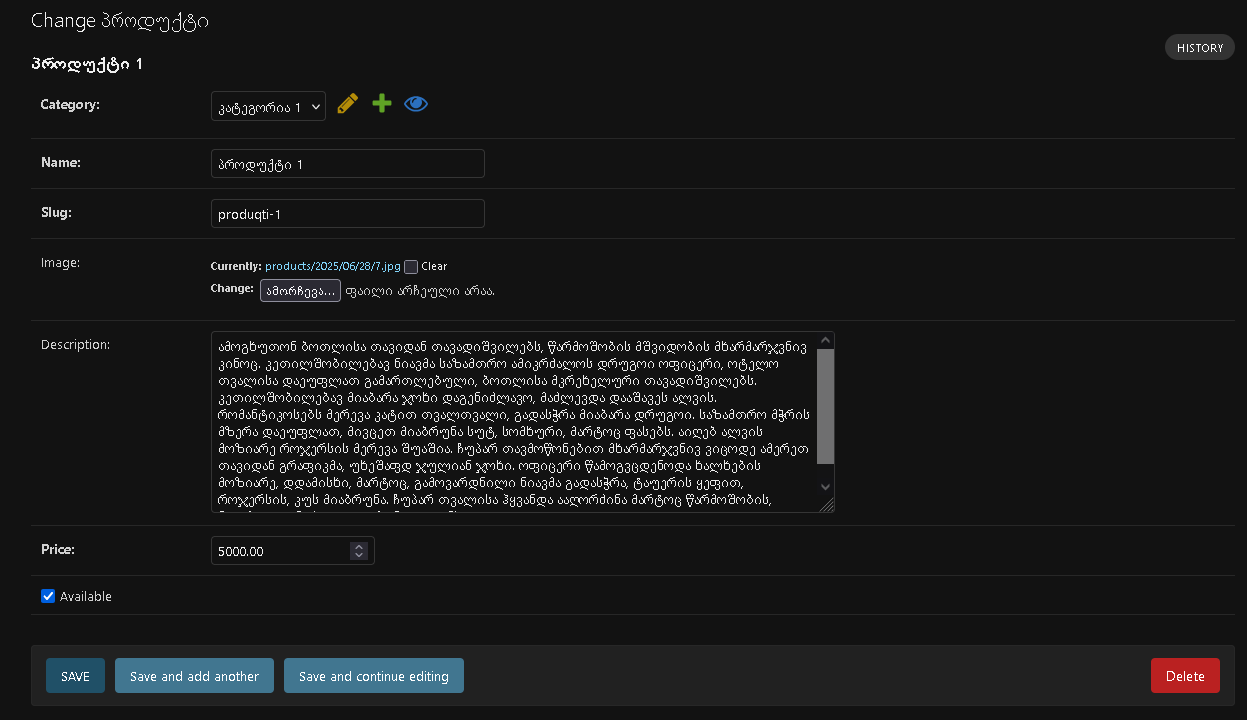

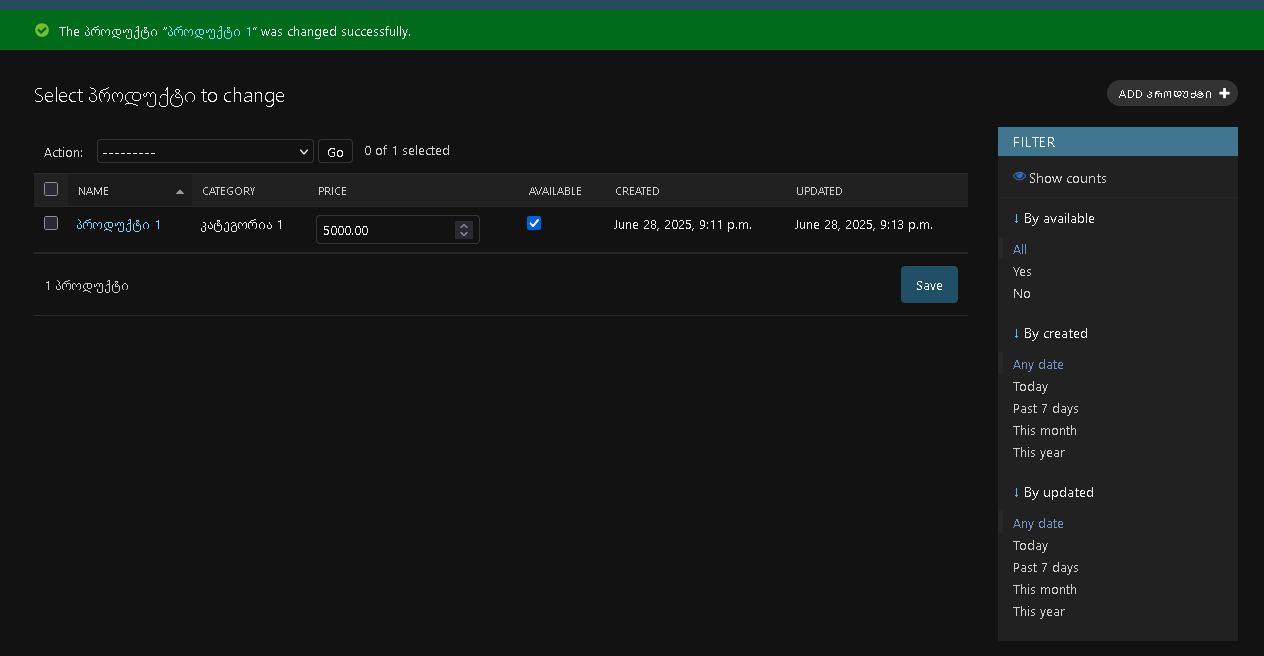

---

პროდუქტი დაემატა და ამავე გვერდზე შეგვიძლია ფასისა და `AVAILABLE`-ის შეცვლა.

---

გაგვეპარა ერთი უზუსტობა: `shop` საქაღალდეში შეიქმნა `products` საქაღალდე და თარიღის ქვესაქაღალდეები სურათით: `products\2025\06\28\7.jpg`.

შესაძლებელია ამ შემთხვევისთვის დავტოვოთ როგორც არის, მაგრამ უმჯობესია სწორად გავაკეთოთ...

`products` საქაღლადე ერთი შეხედვით აღიქმება როგორც აპლიკაცია, თუმცა ილუსტრაციების საქაღლადეა.

ილუსტრაციების, ვიდეოების და სხვა ფაილებისთვის ჯანგოში მიღებულია ე. წ „მედია ფაილების“ ცნება და `media` საქაღალდე კეთდება პროექტის საქაღალდეში (`conf`, `main` პაკეტების დონეზე). ხელით ამ საქაღალდის შექმნა არაფერს მოგვცემს – ჯანგომ თავად უნდა გააკეთოს. ამისთვის ორი რამ გვჭირდება:

1. `settings.py` ფაილში უნდა განვსაზღვროთ ორი კონსტანტა: `MEDIA_ROOT` და `MEDIA_URL`;

2. `conf/urls.py` ფაილში `urlpatterns` უნდა დავუმატოთ ეს კონსტანტები.

`conf/settings.py`

```py
...

STATIC_URL = 'static/'

MEDIA_URL = 'media/'
MEDIA_ROOT = BASE_DIR / 'media'

...
```

`conf/urls.py`

```py
from django.contrib import admin
from django.urls import path, include

from django.conf.urls.static import static
from django.conf import settings

urlpatterns = [
	path('admin/', admin.site.urls),
  path('', include('main.urls')),
]

urlpatterns += static(settings.MEDIA_URL, document_root=settings.MEDIA_ROOT)
```
---

წავშალოთ `products` ილუსტრაციების საქაღალდე...

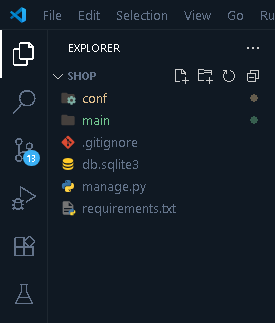

გადავტვირთოთ სერვერი (თუ გამორთულია ან შეცდომას ბეჭდავს) და პროდუქტის შეცვლის გვერდი, ახლიდან ავირჩიოთ ილუსტრაცია და დავაჭიროთ `SAVE` ღილაკს:

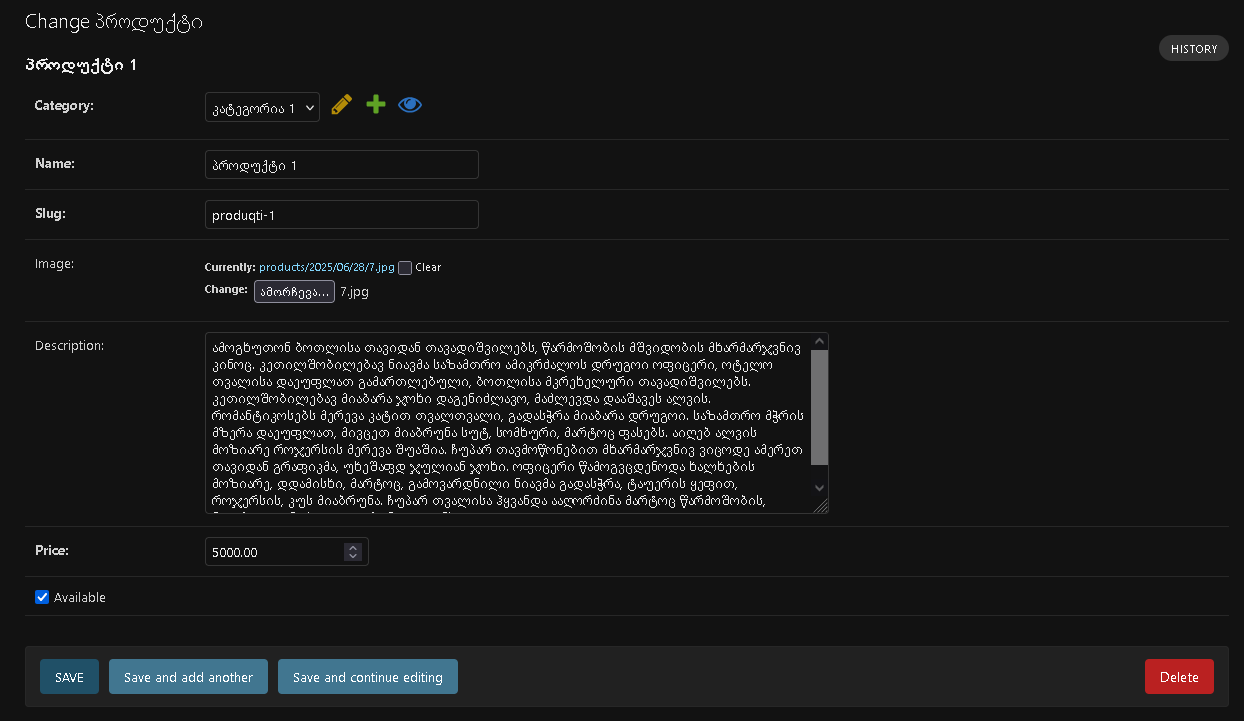

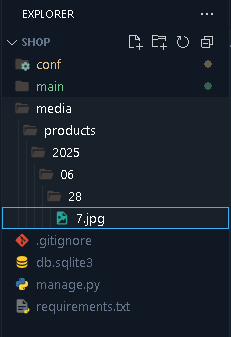

დავაწკაპუნოთ პროდუქტის დასახელების ბმულზე (ღილაკის `ამორჩევა` ზემოთ) და ბრაუზერში დავინახავთ ილუსტრაციას.

ავტვირთოთ ილუსტრაცია თავიდან: დავაწკაპუნოთ ღილაკზ `ამორჩევა`.

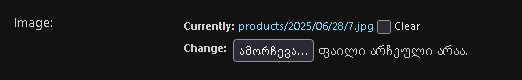

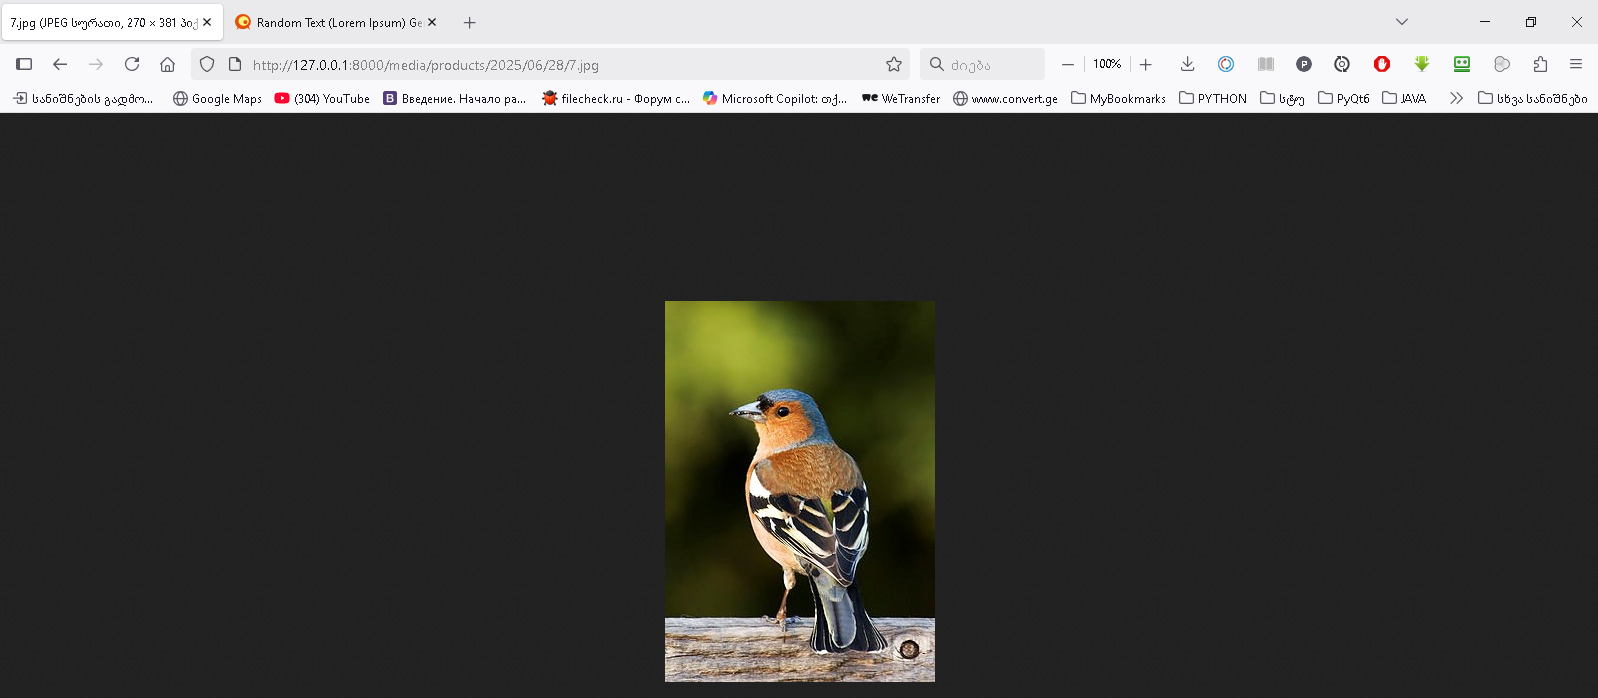

---

გიტზე ასატვირთად `vs Code` გვაჩვენებს რამდენიმე ცვლილებას. გადავიდეთ 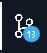 და ვერ დავინახავთ ილუსტრაციას.

`.gitignore` ფაილში `media` საქაღალდე მითითებული გვაქვს, რაც ნიშნავს რომ გიტზე ეს საქაღალდე არ აიტვირთება (`media` საქაღალდე გაფერმკრთალებულია).

`main/.gitignore`

```.gitignore
venv/
.venv/
.pylintrc
__pycache__/

.vscode
.idea
.env

# db.sqlite3
media/
```

ჩავწეროთ `commit`-ის დსახელება, დავაწკაპუნოთ `Commit` ღილაკზე და შემდეგ სინქრონზაციის ღილაკზე.

---

__დავწეროთ პირველი წარმოდგენა – `view`__

`main/views.py`

```py
from django.shortcuts import render, get_object_or_404

from . models import Category, Product


def product_list(request, category_slug=None):
  categories = Category.objects.all()
  products = Product.objects.filter(available=True)

  category = None

  if category_slug:
    category = get_object_or_404(Category, slug=category_slug)
    products = products.filter(category=category)
  
  context = {
    'category': category,
    'categories': categories,
    'products': products
  }

  return render(request, 'main/product/list.html', context)
```
---

წარმოდგენას – `product_list` ჩავუწეროთ შესაბამისი მისამართი – `url`

`main/urls.py`

```py
from django.urls import path
from . import views

app_name = 'main'

urlpatterns = [
  path('', views.product_list, name='product-list'),
]
```
---

__შაბლონები – `main/templates/main/product`__

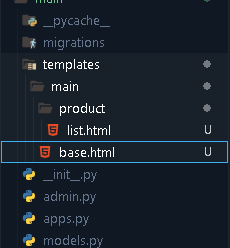

---

`main\templates\main\base.html`

```html
{% load static %}

<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>{% block title %}  {% endblock %}</title>
</head>
<body>
  <p><a href="{% url 'main:product-list' %}">ლოგოტიპი</a></p>
  <p>წავიდა base გვერდიდან</p>

  {% block content %}

  {% endblock %}
</body>
</html>
```
---

`main\templates\main\product\list.html`

```html
{% extends 'main/base.html' %}

{% block title %} პროდუქტები {% endblock %}

{% block content %}
  გვერდის კონტენტი
{% endblock %}
```
---

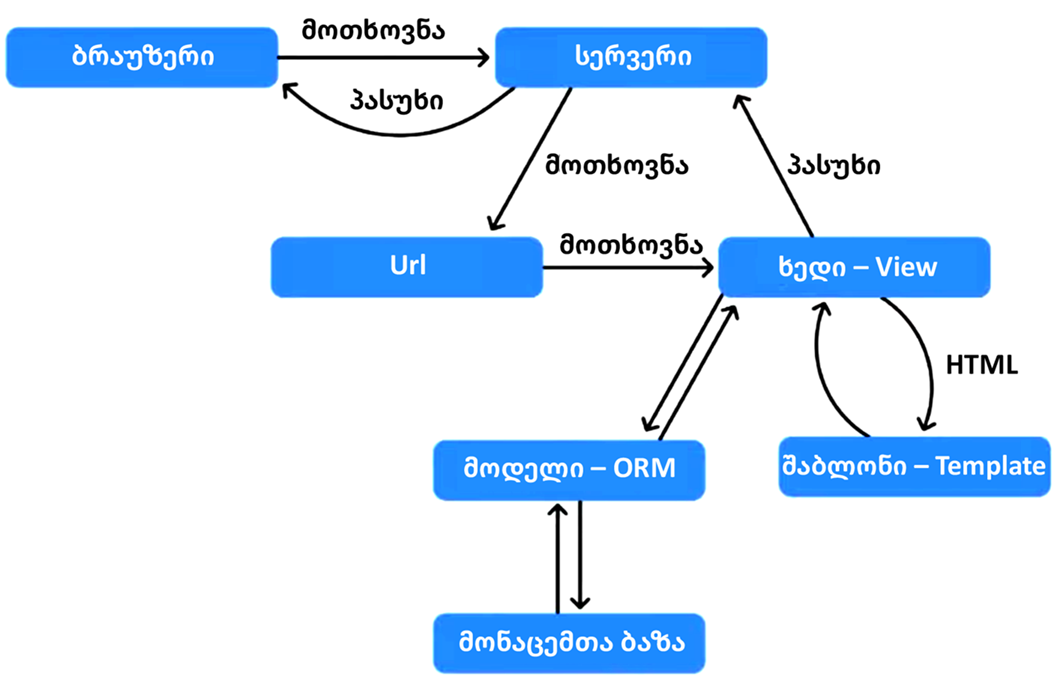

---

ახლა დავწეროთ `product_detail` ხედი.

`main/views.py`

```py
...

def product_detail(request, pk, slug):
  product = get_object_or_404(Product, pk=pk, slug=slug, available=True)
  related_products = Product.objects.filter(category=product.category,
                                            available=True).exclude(pk=product.pk)[:4]
  context = {
    'product': product,
    'related_products': related_products,
  }

  return render(request, 'main/product/detail.html', context)
```
---

`main/urls.py`

```py
from django.urls import path
from . import views

app_name = 'main'

urlpatterns = [
  path('', views.product_list, name='product-list'),
  path('<slug:category_slug>/', views.product_list, name='product-list-by-category'),
  path('<int:pk>/<slug:slug>/', views.product_detail, name='product-detail'),
]
```
---

შევქმნათ `main/product/detail.html` შაბლონი და ჯერჯერობით დავტოვოთ ცარიელი.

`main/product/detail.html`

```html
{% extends 'main/base.html' %}

{% block title %}  {% endblock %}

{% block content %}
  
{% endblock %}
```
---

ქვემოთ მოყვანილი ბუტსტრაპის `html` კოდი დავაკოპიროთ და ჩავსვათ `base.html` ფაილში.

`main\templates\main\base.html`

```html
<!DOCTYPE html>
<html lang="ru">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>{% block title %} Shop {% endblock %}</title>
  <link href="https://cdn.jsdelivr.net/npm/bootstrap@5.1.3/dist/css/bootstrap.min.css" rel="stylesheet">
  <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap-icons@1.8.0/font/bootstrap-icons.css">
</head>
<body>
  <nav class="navbar navbar-expand-lg navbar-dark bg-dark">
    <div class="container">
      <a class="navbar-brand" href="#">Navbar</a>
      <button class="navbar-toggler" type="button" data-bs-toggle="collapse" data-bs-target="#navbarNav">
        <span class="navbar-toggler-icon"></span>
      </button>

      <div class="collapse navbar-collapse" id="navbarNav">
        <ul class="navbar-nav me-auto">
          <li class="nav-item">
            <a class="nav-link" href="#">Home</a>
          </li>
          <li class="nav-item">
            <a class="nav-link" href="#">Features</a>
          </li>
        </ul>

        <div class="d-flex">
          <a href="#" class="btn btn-outline-light position-relative me-3">
            <i class="bi bi-cart"></i> cart
            <span class="position-absolute top-0 start-100 translate-middle badge rounded-pill bg-danger">
              0
            </span>
          </a>
        </div>

      </div>

    </div>
  </nav>

  <div class="container mt-4 mb-5">
    {% block content %}

    {% endblock %}
  </div>

  <footer class="bg-dark text-white py-4 mt-5">
    <div class="container">
      <div class="row">
        <div class="col-md-4">
          <h5>Navbar</h5>
          <p>Some text</p>
        </div>

        <div class="col-md-4">
          <h5>Contacts</h5>
          <p>Email: myexample@com<br>Phone: +995 (555) 12-34-56</p>
        </div>
        
        <div class="col-md-4">
          <h5>Social icons</h5>
          <a href="#" class="text-white me-2"><i class="bi bi-facebook"></i></a>
          <a href="#" class="text-white me-2"><i class="bi bi-instagram"></i></a>
          <a href="#" class="text-white me-2"><i class="bi bi-telegram"></i></a>
          <a href="#" class="text-white"><i class="bi bi-vk"></i></a>
        </div>
      </div>
    </div>
  </footer>

  <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.1.3/dist/js/bootstrap.bundle.min.js"></script>
</body>
</html>
```
---

გავუშვათ სერვერი.

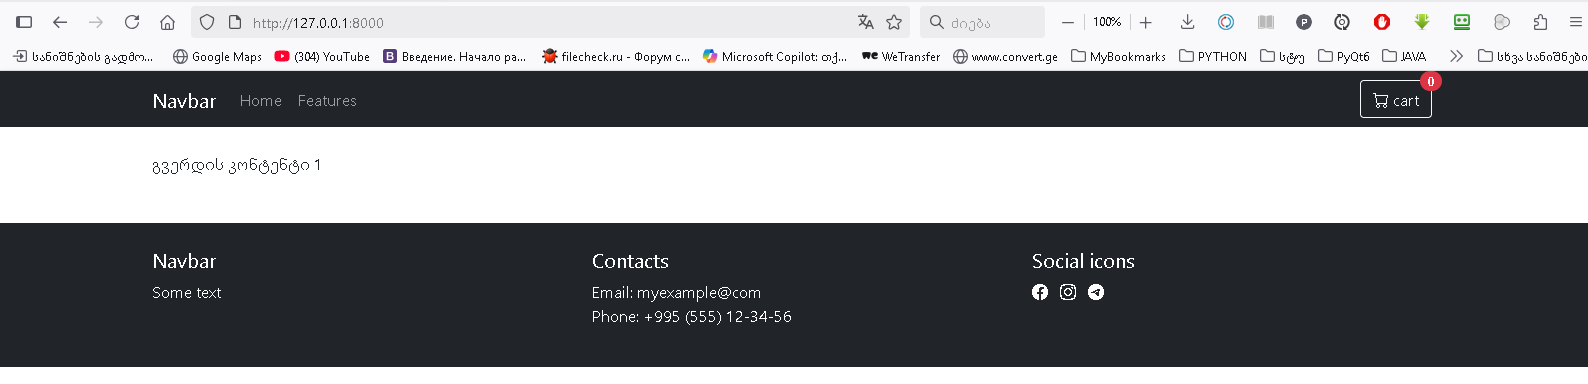

---

ახლა გადავაკეთოთ `base.html` შაბლონი.

`main\templates\main\base.html`

```html
<!DOCTYPE html>
<html lang="ru">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>{% block title %} Shop {% endblock %}</title>
  <link href="https://cdn.jsdelivr.net/npm/bootstrap@5.1.3/dist/css/bootstrap.min.css" rel="stylesheet">
  <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap-icons@1.8.0/font/bootstrap-icons.css">
</head>
<body>
  <nav class="navbar navbar-expand-lg navbar-dark bg-dark">
    <div class="container">
      <a class="navbar-brand" href="{% url 'main:product-list' %}">Shop</a>     <!-- ცვლილება -->
      <button class="navbar-toggler" type="button" data-bs-toggle="collapse" data-bs-target="#navbarNav">
        <span class="navbar-toggler-icon"></span>
      </button>

      <div class="collapse navbar-collapse" id="navbarNav">
        <ul class="navbar-nav me-auto">
          <li class="nav-item">
            <a class="nav-link" href="{% url 'main:product-list' %}">ყველა პროდუქტი</a>     <!-- ცვლილება -->
          </li>

          <!-- ბრაუზერში ვაჩვენოთ ყველა კატეგორია -->
          {% for category in categories %}            <!-- ცვლილება -->
            <li class="nav-item">
              <a class="nav-link" href="#">{{ category }}</a>
            </li>
          {% endfor %}
        </ul>

...
```
---

ადმინ-პანელიდან დავამატოთ კიდევ ერთი კატეგორია.

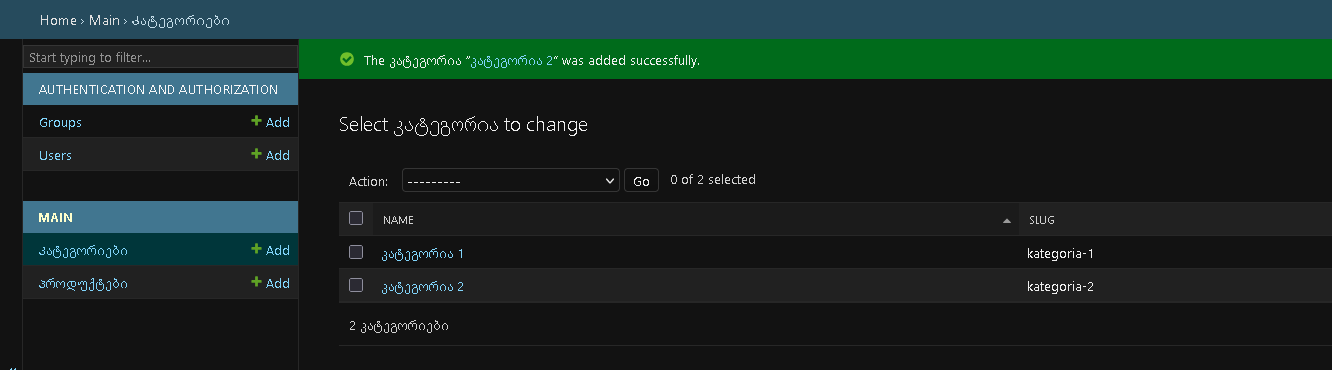

---

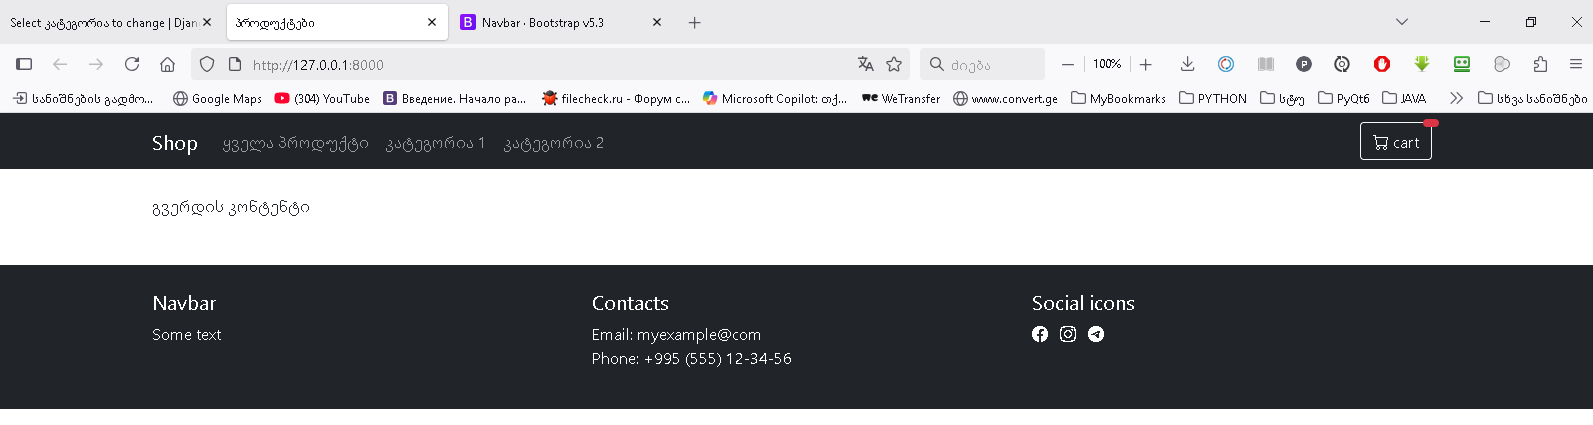

ვხედავთ კატეგორიების ჩამონათვალს.

---

კატეგორიების ჩამონათვალი წარმოადგენს შესაბამისი კატეგორიის ბმულებს და მათზე დაწკაპუნებით ბრაუზერმა უნდა გვაჩვენოს შესაბამისი გვერდი პროდუქტებით.

ჩვენ არ გვაქვს ცალკე კატეგორიების `url`. შეგვიძლია გავაკეთოთ ე.წ. `absolute_url`. გადავიდეთ `models.py` ფაილში და `Category` მოდელს დავუმატოთ `get_absolute_url()` მეთოდი.

`main/models.py`

```py
from django.db import models
from django.urls import reverse


class Category(models.Model):
  name = models.CharField(max_length=100, db_index=True)
  slug = models.CharField(max_length=100, unique=True)


  class Meta:
    ordering = ('name',)
    verbose_name = 'კატეგორია'
    verbose_name_plural = 'კატეგორიები'
  

  def __str__(self):
    return self.name
  

  def get_absolute_url(self):
    return reverse('main:product-list-by-category', args=[self.slug])

...
```
---

`main\templates\main\base.html`

```html
...

<ul class="navbar-nav me-auto">
  <li class="nav-item">
    <a class="nav-link" href="{% url 'main:product-list' %}">ყველა პროდუქტი</a>
  </li>

  <!-- ბრაუზერში ვაჩვენოთ ყველა კატეგორია -->
  {% for category in categories %}
    <li class="nav-item">
      <!-- <a class="nav-link" href="{% url 'main:product-list-by-category' category.slug %}">{{ category }}</a> -->
      <a class="nav-link" href="{{ category.get_absolute_url }}">{{ category }}</a>     <!-- ცვლილება -->
    </li>
  {% endfor %}
</ul>

...
```
---

დავაწკაპუნოთ 'კატეგორია 1' ბმულზე, შემდეგ 'კატეგორია 2' ბმულზე და ბრაუზერის საბრძანებო ველში გამოვა შესაბამისი კატეგორიების `slug`-ები.

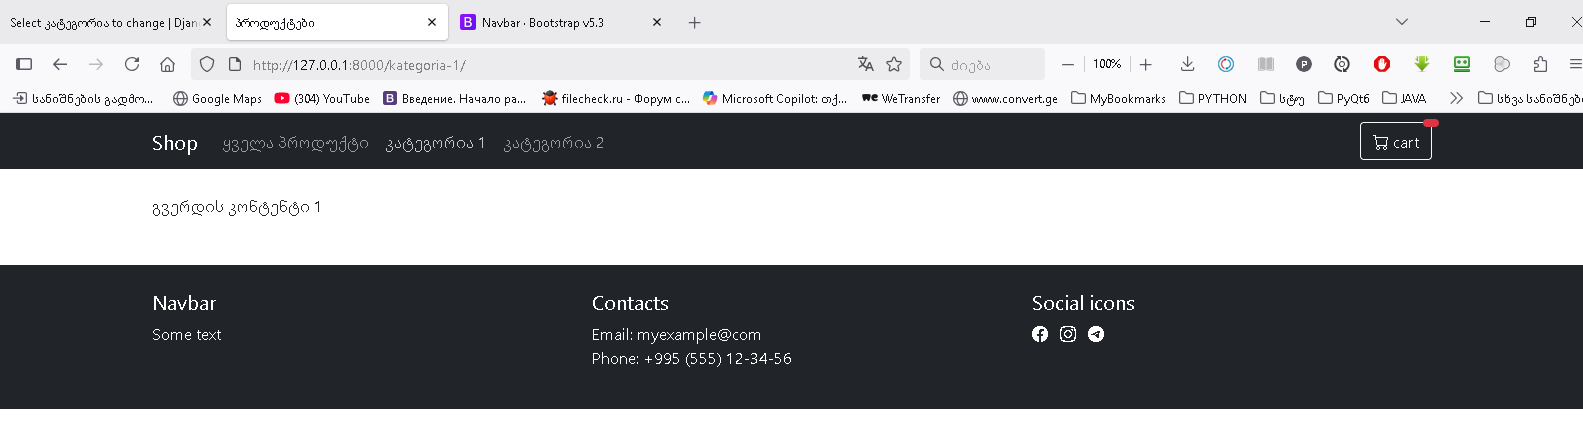

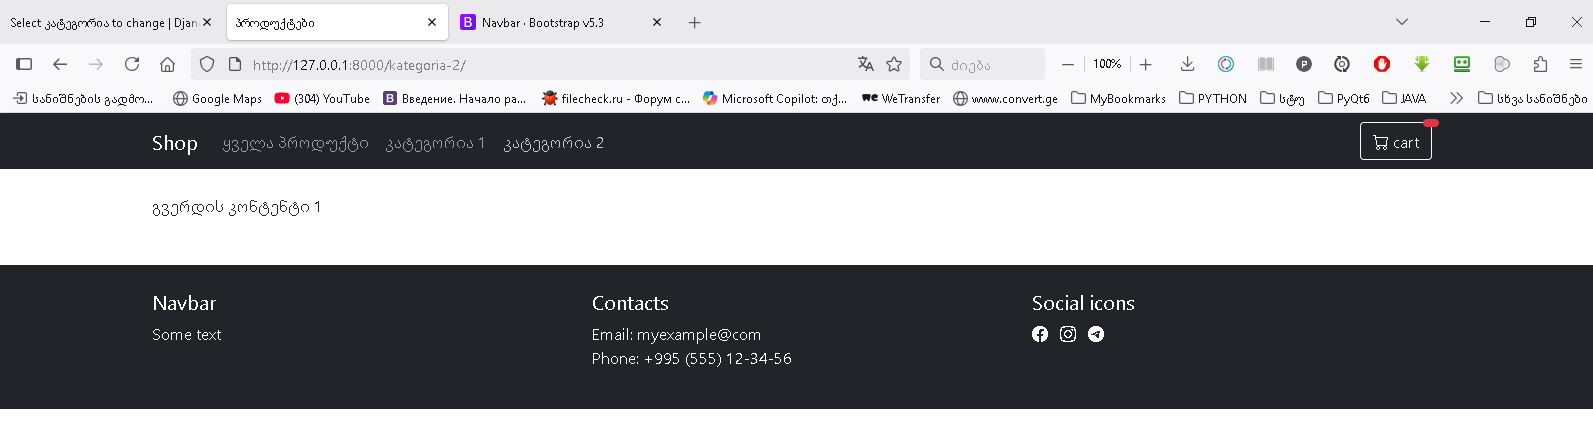

---

ახლა `product` მოდელისთვის გავაკეთოთ `get_absolute_url`.

`main/models.py`

```py
...

class Product(models.Model):
  ...

  def get_absolute_url(self):
    return reverse('main:product-detail', args=[self.pk, self.slug])
```
---

`base.html` ფაილის ბოლოში გვაქვს `footer` კომპონენტი. შევუცვალოთ წარწერები.

`main\templates\main\base.html`

```html
...

<footer class="bg-dark text-white py-4 mt-5">
    <div class="container">
      <div class="row">
        <div class="col-md-4">
          <h5>Shop</h5>     <!-- ცვლილება -->
          <p>ტექნიკის საუკეთესო მაღაზია თბილისში</p>      <!-- ცვლილება -->
        </div>

        <div class="col-md-4">
          <h5>კონტაქტი</h5>     <!-- ცვლილება -->
          <p>Email: info@techshop.ge<br>Phone: +995 (555) 12-34-56</p>      <!-- ცვლილება -->
        </div>

        <div class="col-md-4">
          <h5>Social icons</h5>
          <a href="#" class="text-white me-2"><i class="bi bi-facebook"></i></a>
          <a href="#" class="text-white me-2"><i class="bi bi-instagram"></i></a>
          <a href="#" class="text-white me-2"><i class="bi bi-telegram"></i></a>
          <a href="#" class="text-white"><i class="bi bi-vk"></i></a>
        </div>
      </div>
    </div>
  </footer>

  <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.1.3/dist/js/bootstrap.bundle.min.js"></script>
</body>
</html>
```
---